### MP Deletions

Notes

* Deletions
* HG002 Only
* Technology: MP

* The following classifier will train on and predict the following labels:
    - Exact Match: 1
    - Hom Ref: 0
    - Inaccurate Call: 2

In [1]:
"""
Imports
"""
import pandas as pd
import numpy as np
from fancyimpute import KNN
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut
from scipy.stats import ks_2samp
from scipy import stats
from matplotlib import pyplot
from sklearn import preprocessing
from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA as sklearnPCA
import plotly.plotly as py
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score, precision_score
from sklearn import preprocessing
from ggplot import *
from bokeh.charts import TimeSeries
from bokeh.models import HoverTool
from bokeh.plotting import show
from bokeh.charts import Scatter, Histogram, output_file, show
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.charts import Bar, output_file, show
import bokeh.palettes as palettes
from bokeh.models import HoverTool, BoxSelectTool, Legend
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.



***
Import Data
***

In [2]:
# Import Training Data
# SVanalyzer generated training data
df_train = pd.read_csv('/Volumes/lesleydata/SVanalyzer_ML/Sept122017/Step3_ML/data/train/tech_sep/DEL/IllMP_HG002_DEL.csv')
df_train_2 = pd.read_csv('/Volumes/lesleydata/SVanalyzer_ML/Sept122017/Step3_ML/data/train/tech_sep/DEL/IllMP_HG002_DEL.csv')
df_train.rename(columns={'size': 'Size'}, inplace=True)
df_train.head(1)

,chrom,id,sample,start,end,type,SVtype,Size,refN_cnt,refN_pct,...,IllMP.amb_reason_orientation_orientation,IllMP.amb_reason_same_scores,IllMP.ref_alnScore_mean,IllMP.ref_alnScore_std,IllMP.ref_count,IllMP.ref_insertSize_mean,IllMP.ref_insertSize_std,IllMP.ref_reason_alignmentScore,IllMP.ref_reason_insertSizeScore,IllMP.ref_reason_orientation
0,1,39,HG002,109690878,109690918,Insertion,Deletion,-39,0,0,...,35.0,396.0,474.0,40.447497,4.0,7461.0,757.261514,3.0,0.0,1.0


In [3]:
# Import Test Data
# SVanalyzer generated training data
df_test = pd.read_csv('/Volumes/lesleydata/SVanalyzer_ML/Sept122017/Step3_ML/data/test/tech_sep/DEL/IllMP_HG002_DEL.csv')
df_test_2 = pd.read_csv('/Volumes/lesleydata/SVanalyzer_ML/Sept122017/Step3_ML/data/test/tech_sep/DEL/IllMP_HG002_DEL.csv')
df_test.rename(columns={'size': 'Size'}, inplace=True)
df_test.head(1)

,chrom,id,sample,start,end,type,SVtype,Size,refN_cnt,refN_pct,...,IllMP.amb_reason_orientation_orientation,IllMP.amb_reason_same_scores,IllMP.ref_alnScore_mean,IllMP.ref_alnScore_std,IllMP.ref_count,IllMP.ref_insertSize_mean,IllMP.ref_insertSize_std,IllMP.ref_reason_alignmentScore,IllMP.ref_reason_insertSizeScore,IllMP.ref_reason_orientation
0,5,1,HG002,15411043,15411104,Insertion,Deletion,-60,0,0,...,35.0,424.0,464.0,0.0,1.0,5511.0,0.0,1.0,0.0,0.0


In [4]:
# Store header names in lists and find names that are NOT contained in BOTH lists
c = list(df_train.columns.values)
d = list(df_test.columns.values)
set(c) - set(d)

{'Label'}

In [5]:
### Drop columns that are not shared by both dataframes
df_train.drop(['GTcons'], axis=1, inplace = True)
df_train.drop(['GTconflict'], axis=1, inplace = True)
df_train.drop(['GTsupp'], axis=1, inplace = True)
df_train.drop(['sample'], axis=1, inplace = True)
df_train.drop(['SVtype'], axis=1, inplace = True)
df_train.drop(['type'], axis=1, inplace = True)
df_train.drop(['id'], axis=1, inplace = True)

In [6]:
df_train.head(1)

,chrom,start,end,Size,refN_cnt,refN_pct,segdup_cnt,segdup_pct,tandemrep_cnt,tandemrep_pct,...,IllMP.amb_reason_orientation_orientation,IllMP.amb_reason_same_scores,IllMP.ref_alnScore_mean,IllMP.ref_alnScore_std,IllMP.ref_count,IllMP.ref_insertSize_mean,IllMP.ref_insertSize_std,IllMP.ref_reason_alignmentScore,IllMP.ref_reason_insertSizeScore,IllMP.ref_reason_orientation
0,1,109690878,109690918,-39,0,0,0,0.0,1,0.4,...,35.0,396.0,474.0,40.447497,4.0,7461.0,757.261514,3.0,0.0,1.0


In [7]:
df_train['chrom'].replace('X', 23, inplace=True)
df_train['chrom'].replace('Y', 24, inplace=True)
df_test['chrom'].replace('X', 23, inplace=True)
df_test['chrom'].replace('Y', 24, inplace=True)

In [8]:
# Store header names in lists and find names that are NOT contained in BOTH lists
c = list(df_train.columns.values)
d = list(df_test.columns.values)
set(d) - set(c)

{'GTconflict', 'GTcons', 'GTsupp', 'SVtype', 'id', 'sample', 'type'}

In [9]:
### Drop columns that are not shared by both dataframes
df_test.drop(['GTcons'], axis=1, inplace = True)
df_test.drop(['GTconflict'], axis=1, inplace = True)
df_test.drop(['GTsupp'], axis=1, inplace = True)
df_test.drop(['sample'], axis=1, inplace = True)
df_test.drop(['SVtype'], axis=1, inplace = True)
df_test.drop(['type'], axis=1, inplace = True)
df_test.drop(['id'], axis=1, inplace = True)

***
Impute missing values using KNN
***

In [10]:
# Store training data in a new variable which will be converted to a matrix
X = df_train
X.head(3)

,chrom,start,end,Size,refN_cnt,refN_pct,segdup_cnt,segdup_pct,tandemrep_cnt,tandemrep_pct,...,IllMP.amb_reason_orientation_orientation,IllMP.amb_reason_same_scores,IllMP.ref_alnScore_mean,IllMP.ref_alnScore_std,IllMP.ref_count,IllMP.ref_insertSize_mean,IllMP.ref_insertSize_std,IllMP.ref_reason_alignmentScore,IllMP.ref_reason_insertSizeScore,IllMP.ref_reason_orientation
0,1,109690878,109690918,-39,0,0,0,0.000000,1,0.4,...,35.0,396.0,474.0,40.447497,4.0,7461.0,757.261514,3.0,0.0,1.0
1,1,1869280,1869312,-31,0,0,0,0.000000,0,0.0,...,35.0,247.0,430.5,78.171286,4.0,6522.0,1158.737028,4.0,0.0,0.0
2,1,2891239,2891284,-44,0,0,1,0.666667,1,1.0,...,31.0,268.0,430.0,0.000000,1.0,3114.0,0.000000,1.0,0.0,0.0


In [11]:
# Convert dataframe to matrix
X=X.as_matrix()

#Imput missing values from three closest observations
X_imputed=KNN(k=3).complete(X)
X=pd.DataFrame(X_imputed)

Imputing row 1/2340 with 1 missing, elapsed time: 1.626
Imputing row 101/2340 with 1 missing, elapsed time: 1.671
Imputing row 201/2340 with 1 missing, elapsed time: 1.676
Imputing row 301/2340 with 1 missing, elapsed time: 1.682
Imputing row 401/2340 with 1 missing, elapsed time: 1.688
Imputing row 501/2340 with 1 missing, elapsed time: 1.693
Imputing row 601/2340 with 1 missing, elapsed time: 1.699
Imputing row 701/2340 with 1 missing, elapsed time: 1.707
Imputing row 801/2340 with 1 missing, elapsed time: 1.714
Imputing row 901/2340 with 1 missing, elapsed time: 1.718
Imputing row 1001/2340 with 1 missing, elapsed time: 1.723
Imputing row 1101/2340 with 1 missing, elapsed time: 1.727
Imputing row 1201/2340 with 1 missing, elapsed time: 1.732
Imputing row 1301/2340 with 1 missing, elapsed time: 1.737
Imputing row 1401/2340 with 0 missing, elapsed time: 1.743
Imputing row 1501/2340 with 0 missing, elapsed time: 1.744
Imputing row 1601/2340 with 0 missing, elapsed time: 1.744
Imputing 

In [12]:
# Store header values in a list, will be used later to re-label the matrix post KNN imputation
dftrain_header = list(df_train.columns.values)
X.columns = dftrain_header
X.head(3)

,chrom,start,end,Size,refN_cnt,refN_pct,segdup_cnt,segdup_pct,tandemrep_cnt,tandemrep_pct,...,IllMP.amb_reason_orientation_orientation,IllMP.amb_reason_same_scores,IllMP.ref_alnScore_mean,IllMP.ref_alnScore_std,IllMP.ref_count,IllMP.ref_insertSize_mean,IllMP.ref_insertSize_std,IllMP.ref_reason_alignmentScore,IllMP.ref_reason_insertSizeScore,IllMP.ref_reason_orientation
0,1.0,109690878.0,109690918.0,-39.0,0.0,0.0,0.0,0.000000,1.0,0.4,...,35.0,396.0,474.0,40.447497,4.0,7461.0,757.261514,3.0,0.0,1.0
1,1.0,1869280.0,1869312.0,-31.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,35.0,247.0,430.5,78.171286,4.0,6522.0,1158.737028,4.0,0.0,0.0
2,1.0,2891239.0,2891284.0,-44.0,0.0,0.0,1.0,0.666667,1.0,1.0,...,31.0,268.0,430.0,0.000000,1.0,3114.0,0.000000,1.0,0.0,0.0


In [13]:
# Store Labels in a new 'Y' DataFrame
Y = pd.DataFrame()
Y['Label'] = X['Label']

In [14]:
#Count the number of labels
pd.value_counts(Y['Label'].values, sort=False)

1.0    641
0.0    709
2.0    990
dtype: int64

In [15]:
# Remove labels from feature set
X.drop(['Label'],axis=1, inplace = True)

In [16]:
# Order features
X4 = X.reindex_axis(sorted(X.columns), axis=1)

***
Machine Learning
***

<a id='machine_learning'></a>

Description:

   * In the following section a random forest model will be trained on svanalyzer data.
   **FYI**: [see description below of the SVanalyzer data](#svan_1)
       * The model was trained using [train/test split](http://scikit-learn.org/0.16/modules/generated/sklearn.cross_validation.train_test_split.html) where 70% of the data was used to train the model and the model performance was determined by predicting labels for the remaining 30% of the data
       * Reminder: The labels for this training set and the following [prediction step](#prediction_step) are:
           * Exact Match (1)
           * Homozygous Reference (0)
           * Inaccurate Call (2)
           
   * The trained model will be used to predict labels for 5000 randomly selected deletions [these datapoints were randomly selected from [union_170509_refalt.sort.vcf](ftp://ftp-trace.ncbi.nlm.nih.gov/giab/ftp/data/AshkenazimTrio/analysis/NIST_UnionSVs_05092017/)]
   
   

<a id='svan_1'></a>
* **Reminder - SVanalyzer data description:** 
     * **1000 Exact Match**: 1000 datapoints were randomly selected from the following [svanalyzer_union_170509_v0.3.0b.vcf](ftp://ftp-trace.ncbi.nlm.nih.gov/giab/ftp/data/AshkenazimTrio/analysis/NIST_UnionSVs_05092017/Preliminary_Integrations_v0.3.0/)
     * **1000 Homozygous Reference**: 1000 datapoints were randomly selected from the following [svanalyzer_union_170509_v0.3.0b.vcf](ftp://ftp-trace.ncbi.nlm.nih.gov/giab/ftp/data/AshkenazimTrio/analysis/NIST_UnionSVs_05092017/Preliminary_Integrations_v0.3.0/)
     * **1000 Inaccurate Calls**: 1000 datapoints were randomly selected from the following
[svanalyzer_union_170509_refalt.2.2.2.clustered.uniquecalls.vcf](ftp://ftp-trace.ncbi.nlm.nih.gov/giab/ftp/data/AshkenazimTrio/analysis/NIST_UnionSVs_05092017/Preliminary_Integrations_v0.3.0/)
   
   * Source of Features: svviz, GA4GH [tandem repeat, segmental duplications, refN], R analysis [consensus genotype, GTsup]   
    

** Train Random Forest Classifier **

<a id='train_test'></a>

In [17]:
# Train Test Split
# Train on 70% of the data and test on 30%
X_train, X_test, y_train, y_test = train_test_split(X4, Y, test_size=0.3, random_state=0)

In [18]:
# Train Random Forest Classifier
model = RandomForestClassifier() 
model.fit(X_train, y_train)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [19]:
# Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 32 (0.104121)
2. feature 1 (0.092466)
3. feature 2 (0.059247)
4. feature 24 (0.043724)
5. feature 26 (0.038264)
6. feature 23 (0.037840)
7. feature 19 (0.037709)
8. feature 5 (0.035017)
9. feature 6 (0.034399)
10. feature 16 (0.033276)
11. feature 25 (0.032273)
12. feature 10 (0.031353)
13. feature 29 (0.030470)
14. feature 28 (0.029663)
15. feature 12 (0.028720)
16. feature 14 (0.028302)
17. feature 27 (0.027369)
18. feature 22 (0.026938)
19. feature 13 (0.026420)
20. feature 11 (0.026046)
21. feature 39 (0.023912)
22. feature 34 (0.023762)
23. feature 9 (0.021975)
24. feature 40 (0.020862)
25. feature 41 (0.019803)
26. feature 33 (0.018612)
27. feature 4 (0.015081)
28. feature 38 (0.011819)
29. feature 3 (0.008999)
30. feature 37 (0.008788)
31. feature 7 (0.007076)
32. feature 20 (0.006789)
33. feature 0 (0.003100)
34. feature 31 (0.002269)
35. feature 30 (0.001877)
36. feature 21 (0.000639)
37. feature 15 (0.000582)
38. feature 18 (0.000435)
39. feature 8

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning:

sort is deprecated, use sort_values(inplace=True) for INPLACE sorting



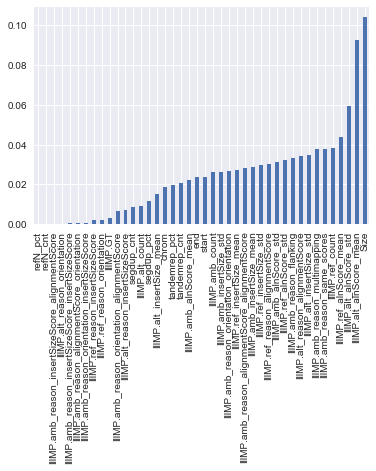

In [20]:
%matplotlib inline
feature_importances = pd.Series(model.feature_importances_, index=X_test.columns)
feature_importances.sort()
feature_importances.plot.bar()

In [21]:
#NOTE: Training Set - Show number of Hom Ref, Hom Var, Het Var datapoints the model was trained on
ytrain = pd.DataFrame()
ytrain['ytrain'] = y_train
pd.value_counts(ytrain['ytrain'].values, sort=False)

1.0    444
0.0    493
2.0    189
dtype: int64

In [22]:
model.predict(X_test)

array([ 0.,  2.,  1.,  1.,  0.,  1.,  2.,  0.,  0.,  0.,  1.,  0.,  2.,
        0.,  0.,  0.,  0.,  2.,  2.,  2.,  0.,  0.,  2.,  0.,  0.,  2.,
        2.,  0.,  0.,  2.,  2.,  1.,  0.,  0.,  0.,  2.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  1.,  0.,  2.,  0.,  0.,  0.,  1.,  1.,  1.,
        2.,  1.,  2.,  2.,  2.,  2.,  0.,  2.,  2.,  2.,  1.,  2.,  0.,
        2.,  2.,  0.,  2.,  2.,  2.,  0.,  0.,  1.,  1.,  0.,  1.,  2.,
        2.,  1.,  1.,  0.,  2.,  2.,  1.,  2.,  2.,  1.,  1.,  0.,  1.,
        2.,  2.,  0.,  0.,  0.,  0.,  2.,  1.,  2.,  2.,  1.,  1.,  2.,
        1.,  2.,  0.,  2.,  1.,  1.,  0.,  1.,  2.,  2.,  1.,  1.,  1.,
        1.,  2.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  2.,  0.,  2.,  1.,
        2.,  1.,  0.,  2.,  1.,  2.,  2.,  2.,  1.,  0.,  0.,  0.,  2.,
        2.,  2.,  2.,  2.,  0.,  1.,  0.,  2.,  0.,  1.,  1.,  0.,  2.,
        2.,  2.,  0.,  1.,  1.,  0.,  0.,  0.,  2.,  0.,  1.,  1.,  2.,
        2.,  1.,  1.,  2.,  0.,  1.,  2.,  1.,  0.,  2.,  2.,  0

In [23]:
pred = model.predict(X_test)

In [24]:
print('Precision score of the training subset: {:.3f}'.format(precision_score(pred, y_test, average='micro'))) 

Precision score of the training subset: 0.756


In [25]:
# Add original labels and predicted labels back to the original dataframe
df_Xtest = pd.DataFrame(X_test)
df_Xtest.head()

,IllMP.GT,IllMP.alt_alnScore_mean,IllMP.alt_alnScore_std,IllMP.alt_count,IllMP.alt_insertSize_mean,IllMP.alt_insertSize_std,IllMP.alt_reason_alignmentScore,IllMP.alt_reason_insertSizeScore,IllMP.alt_reason_orientation,IllMP.amb_alnScore_mean,...,Size,chrom,end,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
1980,-1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,359.996460,...,-41.0,4.0,38598858.0,0.0,0.0,0.0,0.0,38598817.0,1.0,0.073171
2078,-1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,359.588971,...,-475.0,5.0,179065925.0,0.0,0.0,0.0,0.0,179065450.0,2.0,0.080000
9,-1.0,400.8,43.682491,5.0,6362.2,2628.855523,5.0,0.0,0.0,360.402154,...,-20.0,1.0,24220960.0,0.0,0.0,0.0,0.0,24220939.0,1.0,1.000000
1117,-1.0,491.0,0.000000,1.0,7229.0,0.000000,1.0,0.0,0.0,357.150179,...,-22.0,4.0,187058131.0,0.0,0.0,0.0,0.0,187058108.0,1.0,1.000000
195,-1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,365.919976,...,-232.0,15.0,71991778.0,0.0,0.0,0.0,0.0,71991545.0,2.0,0.197425


In [26]:
labels = pd.DataFrame(y_test)

In [27]:
df_Xtest['predicted_label'] = pred
df_Xtest['Label'] = df_train['Label']
df_Xtest['chrom'] = df_train['chrom']
df_Xtest['start'] = df_train['start']
df_Xtest['end'] = df_train['end']
# df_Xtest['Y_test'] = labels

In [28]:
pd.value_counts(df_Xtest['Label'].values, sort=False)

0    216
1    197
2    289
dtype: int64

In [29]:
pd.value_counts(df_Xtest['predicted_label'].values, sort=False)

0.0    229
2.0    266
1.0    207
dtype: int64

In [30]:
from sklearn.metrics import confusion_matrix
ytest = df_Xtest['Label']
predict = df_Xtest['predicted_label']
print(confusion_matrix(ytest, predict))

[[169  14  33]
 [ 10 158  29]
 [ 50  35 204]]


In [31]:
df_Xtest['Label'].replace(0, 'Homozygous_Reference', inplace=True)
df_Xtest['Label'].replace(1, 'Heterozygous_Variant', inplace=True)
df_Xtest['Label'].replace(2, 'Homozygous_Variant', inplace=True)
df_Xtest['predicted_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
df_Xtest['predicted_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
df_Xtest['predicted_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

In [32]:
pd.crosstab(ytest, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,158,10,29,197
Homozygous_Reference,14,169,33,216
Homozygous_Variant,35,50,204,289
All,207,229,266,702


In [33]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       0.76      0.80      0.78       197
Homozygous_Reference       0.74      0.78      0.76       216
  Homozygous_Variant       0.77      0.71      0.74       289

         avg / total       0.76      0.76      0.76       702



***
Predict
***

Description:

   * In the [previous section](#machine_learning) the model was trained on svanalyzer data.
   **FYI**: [see description below of the SVanalyzer data](#svan_2)
       * The model was trained using [train/test split](#train_test) where 70% of the data was used to train the model and the model performance was determined by predicting labels for the remaining 30% of the data
       * Reminder: The labels for this training set and the following [prediction step](#prediction_step) are:
           * Exact Match (1)
           * Homozygous Reference (0)
           * Inaccurate Call (2)
           
   * The trained model is used in the following section to predict labels for 5000 randomly selected Deletions [these datapoints were randomly selected from [union_170509_refalt.sort.vcf](ftp://ftp-trace.ncbi.nlm.nih.gov/giab/ftp/data/AshkenazimTrio/analysis/NIST_UnionSVs_05092017/)]
   
   

<a id='svan_2'></a>
* **Reminder - SVanalyzer data description:** 
     * **1000 Exact Match**: 1000 datapoints were randomly selected from the following [svanalyzer_union_170509_v0.3.0b.vcf](ftp://ftp-trace.ncbi.nlm.nih.gov/giab/ftp/data/AshkenazimTrio/analysis/NIST_UnionSVs_05092017/Preliminary_Integrations_v0.3.0/)
     * **1000 Homozygous Reference**: 1000 datapoints were randomly selected from the following [svanalyzer_union_170509_v0.3.0b.vcf](ftp://ftp-trace.ncbi.nlm.nih.gov/giab/ftp/data/AshkenazimTrio/analysis/NIST_UnionSVs_05092017/Preliminary_Integrations_v0.3.0/)
     * **1000 Inaccurate Calls**: 1000 datapoints were randomly selected from the following
[svanalyzer_union_170509_refalt.2.2.2.clustered.uniquecalls.vcf](ftp://ftp-trace.ncbi.nlm.nih.gov/giab/ftp/data/AshkenazimTrio/analysis/NIST_UnionSVs_05092017/Preliminary_Integrations_v0.3.0/)
   
   * Source of Features: svviz, GA4GH [tandem repeat, segmental duplications, refN], R analysis [consensus genotype, GTsup]   
   

** Load Data **

In [34]:
X2 = df_test

** Impute missing values using KNN **

In [35]:
#Convert dataframe to matrix
X2=X2.as_matrix()

#Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

Imputing row 1/4995 with 1 missing, elapsed time: 8.148
Imputing row 101/4995 with 1 missing, elapsed time: 8.165
Imputing row 201/4995 with 1 missing, elapsed time: 8.182
Imputing row 301/4995 with 1 missing, elapsed time: 8.199
Imputing row 401/4995 with 1 missing, elapsed time: 8.215
Imputing row 501/4995 with 1 missing, elapsed time: 8.232
Imputing row 601/4995 with 1 missing, elapsed time: 8.249
Imputing row 701/4995 with 1 missing, elapsed time: 8.259
Imputing row 801/4995 with 1 missing, elapsed time: 8.269
Imputing row 901/4995 with 1 missing, elapsed time: 8.279
Imputing row 1001/4995 with 2 missing, elapsed time: 8.288
Imputing row 1101/4995 with 2 missing, elapsed time: 8.300
Imputing row 1201/4995 with 2 missing, elapsed time: 8.310
Imputing row 1301/4995 with 2 missing, elapsed time: 8.320
Imputing row 1401/4995 with 2 missing, elapsed time: 8.330
Imputing row 1501/4995 with 2 missing, elapsed time: 8.341
Imputing row 1601/4995 with 2 missing, elapsed time: 8.352
Imputing 

In [36]:
dftest_header = list(df_test.columns.values)
X2.columns = dftest_header
X2.head(3)

,chrom,start,end,Size,refN_cnt,refN_pct,segdup_cnt,segdup_pct,tandemrep_cnt,tandemrep_pct,...,IllMP.amb_reason_orientation_orientation,IllMP.amb_reason_same_scores,IllMP.ref_alnScore_mean,IllMP.ref_alnScore_std,IllMP.ref_count,IllMP.ref_insertSize_mean,IllMP.ref_insertSize_std,IllMP.ref_reason_alignmentScore,IllMP.ref_reason_insertSizeScore,IllMP.ref_reason_orientation
0,5.0,15411043.0,15411104.0,-60.0,0.0,0.0,0.0,0.0,1.0,1.000000,...,35.0,424.0,464.0,0.000000,1.0,5511.00,0.000000,1.0,0.0,0.0
1,7.0,158112624.0,158112712.0,-88.0,0.0,0.0,0.0,0.0,2.0,0.715909,...,31.0,264.0,390.5,72.929761,4.0,7324.75,570.944557,4.0,0.0,0.0
2,4.0,95498964.0,95499280.0,-316.0,0.0,0.0,0.0,0.0,1.0,0.117089,...,33.0,416.0,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0


In [37]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

,chrom,start,end,Size,refN_cnt,refN_pct,segdup_cnt,segdup_pct,tandemrep_cnt,tandemrep_pct,...,IllMP.amb_reason_orientation_orientation,IllMP.amb_reason_same_scores,IllMP.ref_alnScore_mean,IllMP.ref_alnScore_std,IllMP.ref_count,IllMP.ref_insertSize_mean,IllMP.ref_insertSize_std,IllMP.ref_reason_alignmentScore,IllMP.ref_reason_insertSizeScore,IllMP.ref_reason_orientation
0,5.0,15411043.0,15411104.0,-60.0,0.0,0.0,0.0,0.0,1.0,1.000000,...,35.0,424.0,464.0,0.000000,1.0,5511.00,0.000000,1.0,0.0,0.0
1,7.0,158112624.0,158112712.0,-88.0,0.0,0.0,0.0,0.0,2.0,0.715909,...,31.0,264.0,390.5,72.929761,4.0,7324.75,570.944557,4.0,0.0,0.0
2,4.0,95498964.0,95499280.0,-316.0,0.0,0.0,0.0,0.0,1.0,0.117089,...,33.0,416.0,0.0,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0


In [38]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

<a id='prediction_step'></a>

In [39]:
model.predict(X5)

array([ 2.,  2.,  1., ...,  1.,  0.,  2.])

In [40]:
pred = model.predict(X5)

In [41]:
pred_prob = model.predict_proba(X5)

In [42]:
X5['predicted_label'] = pred
X5['chrom'] = df_test_2['chrom']
X5['start'] = df_test_2['start']
X5['end'] = df_test_2['end']
X5['Size'] = df_test_2['Size']
X5['GTcons'] = df_test_2['GTcons']
X5['GTsupp'] = df_test_2['GTsupp']

In [43]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])

In [44]:
X6.to_csv('MP_pred_prob_DEL_SVanalyzer.csv', index=False)

In [ ]:
#Note: Reformat X6 csv

In [45]:
X6 = pd.read_csv('/Users/lmc2/NIST/Notebooks/SVanalyzer_ML/DEL/results/MP/MP_pred_prob_DEL_SVanalyzer.csv')

In [46]:
X6.rename(columns={'1': 'Homozygous_Reference_SVan_predprob'}, inplace=True)
X6.rename(columns={'2': 'Exact_Match_predprob'}, inplace=True)
X6.rename(columns={'3': 'Inaccurate_Call_predprob'}, inplace=True)
X6.rename(columns={'predicted_label': 'MP_predicted_label'}, inplace=True)

In [47]:
X6.head(3)

,Homozygous_Reference_SVan_predprob,Exact_Match_predprob,Inaccurate_Call_predprob,GTcons,GTsupp,IllMP.GT,IllMP.alt_alnScore_mean,IllMP.alt_alnScore_std,IllMP.alt_count,IllMP.alt_insertSize_mean,...,chrom,end,MP_predicted_label,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.2,0.0,0.8,-1,0,-1.0,0.000000,0.00000,0.0,0.000000,...,5,15411104,2,0,0,0,0.0,15411043,1,1.000000
1,0.3,0.1,0.6,-1,0,-1.0,0.000000,0.00000,0.0,0.000000,...,7,158112712,2,0,0,0,0.0,158112624,2,0.715909
2,0.0,0.6,0.4,2,1,-1.0,424.928571,66.44489,14.0,7052.785714,...,4,95499280,1,0,0,0,0.0,95498964,1,0.117089


In [48]:
X6.to_csv('/Volumes/lesleydata/SVanalyzer_ML/Sept122017/Step3_ML/results/MP_final_df_DEL_SVanalyzer.csv', index=False)

***
Label Analysis
***

Description:
  * Comparison of model predicted labels [Exact Match, Homozygous Reference, Inaccurate Calls] to consensus genotype for the 5000 randomly selected datapoints from union_refalt.vcf for HG002 only

In [49]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['MP_predicted_label']
print(confusion_matrix(consensus_GT, predict))

[[   0  166  778  547]
 [   0  447   41  433]
 [   0  136 1435  341]
 [   0    6  577   88]]


In [50]:
X6['GTcons'].replace(-1, 'Unknown', inplace=True)
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['MP_predicted_label'].replace(0.0, 'Homozygous_Reference_SVan', inplace=True)
X6['MP_predicted_label'].replace(1.0, 'Exact_Match', inplace=True)
X6['MP_predicted_label'].replace(2.0, 'Inaccurate_Call', inplace=True)

In [51]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Exact_Match,Homozygous_Reference_SVan,Inaccurate_Call,All
True,,,,
Heterozygous_Variant,1435,136,341,1912
Homozygous_Reference,41,447,433,921
Homozygous_Variant,577,6,88,671
Unknown,778,166,547,1491
All,2831,755,1409,4995


** High Confidence Label Analysis**
* **Reminder:** The labels predicted by the model are the following svanalyzer labels:
    * Homozygous Reference: 0 
    * Exact Match: 1 
    * Inaccurate Call: 2 
* Here **high confidence labels** are the labels predicted by the model that were also assigned a predict probability of either 0.9 or 1
* The following is an analysis of predicted svanalyzer labels with predict probability >0.9

In [52]:
high_conf_labels = X6[(X6['Homozygous_Reference_SVan_predprob'] == 1) | (X6['Homozygous_Reference_SVan_predprob'] == 0.9) | (X6['Exact_Match_predprob'] == 1) | (X6['Exact_Match_predprob'] == 0.9) | (X6['Inaccurate_Call_predprob'] == 1) | (X6['Inaccurate_Call_predprob'] == 0.9)]

In [53]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['MP_predicted_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Exact_Match,Homozygous_Reference_SVan,Inaccurate_Call,All
True,,,,
Heterozygous_Variant,526,10,46,582
Homozygous_Reference,2,78,79,159
Homozygous_Variant,206,0,10,216
Unknown,253,5,152,410
All,987,93,287,1367


***
Graphs
***

** Exact Match **

In [54]:
em = X5['predicted_label'] == 1.0
exact_match = X5[em]

In [55]:
exact_match.head(1)

,IllMP.GT,IllMP.alt_alnScore_mean,IllMP.alt_alnScore_std,IllMP.alt_count,IllMP.alt_insertSize_mean,IllMP.alt_insertSize_std,IllMP.alt_reason_alignmentScore,IllMP.alt_reason_insertSizeScore,IllMP.alt_reason_orientation,IllMP.amb_alnScore_mean,...,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct,predicted_label,GTcons,GTsupp
2,-1.0,424.928571,66.44489,14.0,7052.785714,1142.254924,14.0,0.0,0.0,358.68801,...,0.0,0.0,0.0,0.0,95498964,1.0,0.117089,1.0,2,1


In [56]:
output_notebook()

Loading BokehJS ...

In [57]:
p = figure()
p = Histogram(exact_match, values='GTcons', title='Exact_Match_HG002: Consensust GT', color='LightSlateGray', bins=15, plot_height=250, xlabel="GTcons", ylabel="Frequency")
show(p)

** Homozygous Reference **

In [58]:
hr = X5['predicted_label'] == 0.0
hom_ref = X5[hr]
hom_ref.head(1)

,IllMP.GT,IllMP.alt_alnScore_mean,IllMP.alt_alnScore_std,IllMP.alt_count,IllMP.alt_insertSize_mean,IllMP.alt_insertSize_std,IllMP.alt_reason_alignmentScore,IllMP.alt_reason_insertSizeScore,IllMP.alt_reason_orientation,IllMP.amb_alnScore_mean,...,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct,predicted_label,GTcons,GTsupp
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,348.774515,...,0.0,0.0,1.0,1.0,49826756,1.0,1.0,0.0,-1,0


In [59]:
p = figure()
p = Histogram(hom_ref, values='GTcons', title='Homozygous_Reference_HG002: Consensust GT', color='LightSlateGray', bins=15, plot_height=250, xlabel="GTcons", ylabel="Frequency")
show(p)

** Inaccurate Call **

In [60]:
ic = X5['predicted_label'] == 2.0
inac_call = X5[ic]
inac_call.head(1)

,IllMP.GT,IllMP.alt_alnScore_mean,IllMP.alt_alnScore_std,IllMP.alt_count,IllMP.alt_insertSize_mean,IllMP.alt_insertSize_std,IllMP.alt_reason_alignmentScore,IllMP.alt_reason_insertSizeScore,IllMP.alt_reason_orientation,IllMP.amb_alnScore_mean,...,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct,predicted_label,GTcons,GTsupp
0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,357.541737,...,0.0,0.0,0.0,0.0,15411043,1.0,1.0,2.0,-1,0


In [61]:
p = figure()
p = Histogram(inac_call, values='GTcons', title='Inaccurate_Call_HG002: Consensust GT', color='LightSlateGray', bins=15, plot_height=250, xlabel="GTcons", ylabel="Frequency")
show(p)